# 6. Revaluation and Deployment

## 6.1 Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

from sklearn.metrics import confusion_matrix

from Helpers_NN import conf_matrix
from Classification import Classification

from tensorflow import keras
from tensorflow.keras.models import load_model
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

C:\Users\candy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
sns.set_context('poster')

In [3]:
stacking_model = pickle.load(open('Models/Stacking.pkl','rb'))
neural_net_model =  load_model('Models/Neural_Network.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
x_test = pd.read_csv('Data/4.x_test_data.csv')
y_test = pd.read_csv('Data/4.y_test_data.csv')
x_test_array = np.load('Data/6.x_test.npy')
y_test_ohe = pd.read_csv('Data/6.y_test_ohe.csv')
y_test_nn = pd.read_csv('Data/6.y_test_nn_df.csv')
y_test_predicted_array = np.load('Data/6.y_test_predicted_array.npy')

In [5]:
neural_net_model.save('Models/Neural_Network.h5')

## 6.2 Comparing Stacking Model with Neural Network Model

### 6.2.1 Test Accuracy for Stacking Model

In [6]:
stacking_model.get_test_scores(x_test,y_test)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Stacking,0.55467,0.507709,0.046961


,1,2,3,4,5
precision,0.626344,0.441667,0.417098,0.460000,0.600551
recall,0.619681,0.447887,0.428191,0.473008,0.566234
f1-score,0.622995,0.444755,0.422572,0.466413,0.582888


### 6.2.2 Test Accuracy for Neural Network Model

I tested the neural network model using the test data and achieved an accuracy of <strong>0.5710</strong> which is better than the stacking model accuracy of <strong>0.5077</strong>, by <strong>over 5%</strong>. 
    

In [7]:
neural_net_model.evaluate(x_test_array,y_test_ohe)

[0.9816686870695618, 0.5624668]

### 6.2.3 Confusion Matrix for Stacking Model

I wanted to look at the confusion matrix, as this gives a better idea of how the model is performing over all 5 classes.

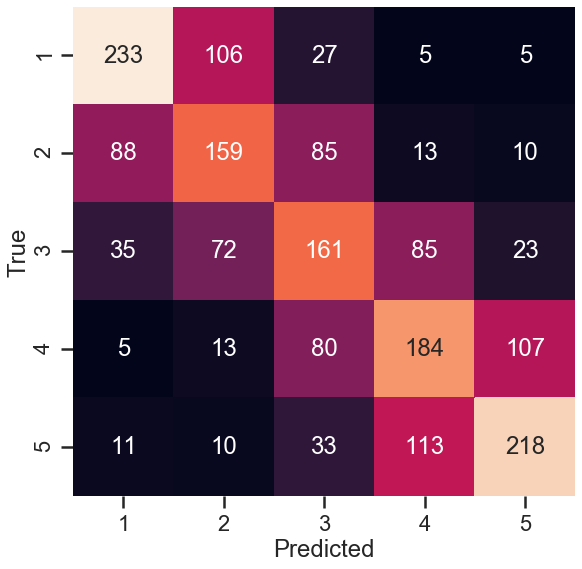

In [8]:
stacking_model.test_conf_matrix()

### 6.2.4 Confusion Matrix for Neural Network Model

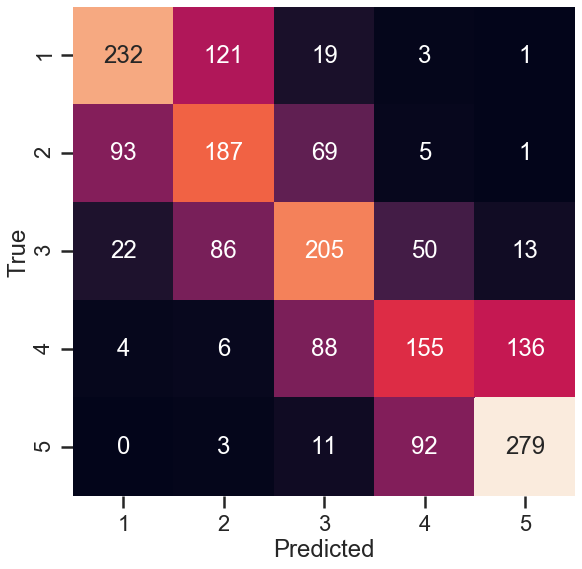

In [9]:
test_cm = confusion_matrix(y_test_nn['score'], y_test_predicted_array)
conf_matrix(test_cm)

The error is more contained with in adjacent scores with the neural network model. Almost zero confusion between extreme scores 1 and 5, and minimal confusion with scores 2 and 4. Although a score of 3 can be harder to predict, there is definitely an improvement from the Stacking model.

## 6.3 Deployment

### 6.3.1 Streamlit Application

After seeing the improvements from the Stacking model, I was more confident about deploying the model for actionable use.

I planned on future improvements being the addition of the neural network model and then creating an application for the model, so as a next step I decided to make a working application to test out new reviews using streamlit.

### 6.3.2 Future Development

- Create a webscraper spider for twitter, reddit, etc for further testing